# Lógica do Segundo Exercício da Apostila

**Aluno:** Rafael Lúcio Negrão Cordeiro<br/>
**Matrícula:** 201310323<br/>
**Disciplina:** CET961 - Engenharia Assistida por Computador

In [32]:
import numpy as np

A1 = 32.3 # cm²
A2 = 38.7 # cm²
A3 = 25.8 # cm²

E1 = 6.9e10  # N / m
E2 = 20.7e10 # N / m
E3 = 20.7e10 # N / m

L1 = 2.54 # m
L2 = 2.54 # m
L3 = 3.59 # m

con1 = (2, 3)
con2 = (1, 2)
con3 = (1, 3)

alpha = np.array([90, 0, 135])

F = 100e3 # kN
Fx = F * np.cos(225 * np.pi / 180)
Fy = F * np.sin(225 * np.pi / 180)

#### Podemos definir a lei de Hooke da seguinte forma:

In [2]:
hooke = lambda E, A, L: E * A / L

#### Compondo o sistema na notaçao matricial $[K_{i}^{(g)}]\{U_{i}^{(g)}\} = \{F_{i}^{(g)}\}$, temos:

$$
\begin{split}
    \overbrace{
        \begin{bmatrix}
            k_{1 x 1 (i)} & k_{1 x 2 (i)} & k_{1 x 3 (i)} & k_{1 x 4 (i)}\\
            k_{2 x 1 (i)} & k_{2 x 2 (i)} & k_{2 x 3 (i)} & k_{2 x 4 (i)}\\
            k_{3 x 1 (i)} & k_{3 x 2 (i)} & k_{3 x 3 (i)} & k_{3 x 4 (i)}\\
            k_{4 x 1 (i)} & k_{4 x 2 (i)} & k_{4 x 3 (i)} & k_{4 x 4 (i)}
        \end{bmatrix}
    }^{[K^{(g)}_i]}
    \overbrace{
        \begin{Bmatrix}
            u_{iX}^E\\
            u_{iY}^E\\
            u_{iX}^D\\
            u_{iY}^D
        \end{Bmatrix}
    }^{\{U^{(g)}_i\}}
    =
    \overbrace{
        \begin{Bmatrix}
            F_{iX}^{E}\\
            F_{iY}^{E}\\
            F_{iX}^{D}\\
            F_{iY}^{D}
        \end{Bmatrix}
    }^{\{F^{(g)}_i\}}\\
    \overbrace{
        \frac{E_iA_i}{L_i}
        \begin{bmatrix}
            \cos^2\alpha_i & \cos\alpha_i\sin\alpha_i & -\cos^2\alpha_i & -\cos\alpha_i\sin\alpha_i\\
            \cos\alpha_i\sin\alpha_i & \sin^2\alpha_i & -\cos\alpha_i\sin\alpha_i & -\sin^2\alpha_i\\
            -\cos^2\alpha_i & -\cos\alpha_i\sin\alpha_i & \cos^2\alpha_i & \cos\alpha_i\sin\alpha_i\\
            -\cos\alpha_i\sin\alpha_i & -\sin^2\alpha_i & \cos\alpha_i\sin\alpha_i & \sin^2\alpha_i
        \end{bmatrix}
    }^{[K^{(g)}_i]}
    \overbrace{
        \begin{bmatrix}
            \cos\alpha_i & 0\\
            \sin\alpha_i & 0\\
            0 & \cos\alpha_i\\
            0 & \sin\alpha_i
        \end{bmatrix}
        \begin{Bmatrix}
            u_{iX}^E\\
            u_{iX}^D
        \end{Bmatrix}
    }^{\{U^{(g)}_i\}}=
    \overbrace{
        \begin{bmatrix}
            \cos\alpha_i & 0\\
            \sin\alpha_i & 0\\
            0 & \cos\alpha_i\\
            0 & \sin\alpha_i
        \end{bmatrix}
        \begin{Bmatrix}
            F_{iX}^E\\
            F_{iX}^D
        \end{Bmatrix}
    }^{\{F^{(g)}_i\}}
\end{split}
$$

Representando em forma de sistema, temos:

$$
\begin{equation}
    \frac{E_iA_i}{L_i}
    x
    \begin{cases}
        (\cos^3\alpha_i + \cos\alpha_i\sin^2\alpha_i)u_{iX}^E - (\cos^3\alpha_i + \cos\alpha_i\sin^2\alpha_i)u_{iX}^D = \cos\alpha_iF_{iX}^E + 0F_{iX}^D\\
        (\cos^2\alpha_i\sin\alpha_i + \sin^3\alpha_i)u_{iX}^E - (\cos^2\alpha_i\sin\alpha_i + \sin^3\alpha_i)u_{iX}^D = \sin\alpha_iF_{iX}^E + 0F_{iX}^D\\
        -(\cos^3\alpha_i + \cos\alpha_i\sin^2\alpha_i)u_{iX}^E + (\cos^3\alpha_i + \cos\alpha_i\sin^2\alpha_i)u_{iX}^D = 0F_{iX}^E + \cos\alpha_iF_{iX}^D\\
        -(\cos^2\alpha_i\sin\alpha_i + \sin^3\alpha_i)u_{iX}^E + (\cos^2\alpha_i\sin\alpha_i + \sin^3\alpha_i)u_{iX}^D = 0F_{iX}^E + \sin\alpha_iF_{iX}^D
    \end{cases}
    \Rightarrow
    \begin{cases}
        \frac{E_iA_i}{L_i}((\cos^3\alpha_i + \cos\alpha_i\sin^2\alpha_i)u_{iX}^E - (\cos^3\alpha_i + \cos\alpha_i\sin^2\alpha_i)u_{iX}^D)) = \cos\alpha_iF_{iX}^E + 0F_{iX}^D\\
        \frac{E_iA_i}{L_i}((\cos^2\alpha_i\sin\alpha_i + \sin^3\alpha_i)u_{iX}^E - (\cos^2\alpha_i\sin\alpha_i + \sin^3\alpha_i)u_{iX}^D)) = \sin\alpha_iF_{iX}^E + 0F_{iX}^D\\
        \frac{E_iA_i}{L_i}(-(\cos^3\alpha_i + \cos\alpha_i\sin^2\alpha_i)u_{iX}^E + (\cos^3\alpha_i + \cos\alpha_i\sin^2\alpha_i)u_{iX}^D) = 0F_{iX}^E + \cos\alpha_iF_{iX}^D\\
        \frac{E_iA_i}{L_i}(-(\cos^2\alpha_i\sin\alpha_i + \sin^3\alpha_i)u_{iX}^E + (\cos^2\alpha_i\sin\alpha_i + \sin^3\alpha_i)u_{iX}^D) = 0F_{iX}^E + \sin\alpha_iF_{iX}^D
    \end{cases}\\
    \begin{cases}
        \frac{E_iA_i}{L_i}((\cos^3\alpha_i + \cos\alpha_i\sin^2\alpha_i)u_{iX}^E - (\cos^3\alpha_i + \cos\alpha_i\sin^2\alpha_i)u_{iX}^D)) - (\cos\alpha_iF_{iX}^E + 0F_{iX}^D) = 0\\
        \frac{E_iA_i}{L_i}((\cos^2\alpha_i\sin\alpha_i + \sin^3\alpha_i)u_{iX}^E - (\cos^2\alpha_i\sin\alpha_i + \sin^3\alpha_i)u_{iX}^D)) - (\sin\alpha_iF_{iX}^E + 0F_{iX}^D) = 0\\
        \frac{E_iA_i}{L_i}(-(\cos^3\alpha_i + \cos\alpha_i\sin^2\alpha_i)u_{iX}^E + (\cos^3\alpha_i + \cos\alpha_i\sin^2\alpha_i)u_{iX}^D) - (0F_{iX}^E + \cos\alpha_iF_{iX}^D) = 0\\
        \frac{E_iA_i}{L_i}(-(\cos^2\alpha_i\sin\alpha_i + \sin^3\alpha_i)u_{iX}^E + (\cos^2\alpha_i\sin\alpha_i + \sin^3\alpha_i)u_{iX}^D) - (0F_{iX}^E + \sin\alpha_iF_{iX}^D) = 0
    \end{cases}
\end{equation}
$$

#### A partir desse ponto considera-se os apoios do nó observado

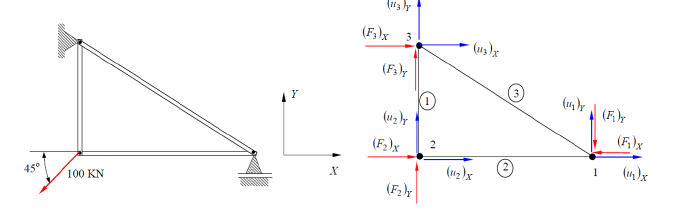

No caso da segunda questao da apostila, o primeiro elemento está fixado com restriçao de deslocamento apenas na sua extremidade superior. 

Entao, segue o cálculo com $u_{iX}^E = 0$:

$$
\begin{equation}
    \begin{cases}
            \frac{E_iA_i}{L_i}((\cos^3\alpha_i + \cos\alpha_i\sin^2\alpha_i)0 - (\cos^3\alpha_i + \cos\alpha_i\sin^2\alpha_i)u_{iX}^D) - (\cos\alpha_iF_{iX}^E + 0F_{iX}^D) = 0\\
            \frac{E_iA_i}{L_i}((\cos^2\alpha_i\sin\alpha_i + \sin^3\alpha_i)0 - (\cos^2\alpha_i\sin\alpha_i + \sin^3\alpha_i)u_{iX}^D) - (\sin\alpha_iF_{iX}^E + 0F_{iX}^D) = 0\\
            \frac{E_iA_i}{L_i}(-(\cos^3\alpha_i + \cos\alpha_i\sin^2\alpha_i)0 + (\cos^3\alpha_i + \cos\alpha_i\sin^2\alpha_i)u_{iX}^D) - (0F_{iX}^E + \cos\alpha_iF_{iX}^D) = 0\\
            \frac{E_iA_i}{L_i}(-(\cos^2\alpha_i\sin\alpha_i + \sin^3\alpha_i)0 + (\cos^2\alpha_i\sin\alpha_i + \sin^3\alpha_i)u_{iX}^D) - (0F_{iX}^E + \sin\alpha_iF_{iX}^D) = 0
    \end{cases}
    \Rightarrow
    \begin{cases}
            0 - (\cos^3\alpha_i + \cos\alpha_i\sin^2\alpha_i) - (\cos\alpha_iF_{iX}^E + 0F_{iX}^D) = 0\\
            0 - (\cos^2\alpha_i\sin\alpha_i + \sin^3\alpha_i) - (\sin\alpha_iF_{iX}^E + 0F_{iX}^D) = 0\\
            0 + (\cos^3\alpha_i + \cos\alpha_i\sin^2\alpha_i) - (0F_{iX}^E + \cos\alpha_iF_{iX}^D) = 0\\
            0 + (\cos^2\alpha_i\sin\alpha_i + \sin^3\alpha_i) - (0F_{iX}^E + \sin\alpha_iF_{iX}^D) = 0
    \end{cases}\\
\end{equation}
$$

Voltando para a notaçao matricial:

$$
\begin{bmatrix}
    0 & - (\cos^3\alpha_i + \cos\alpha_i\sin^2\alpha_i) & \cos\alpha_i & 0\\
    0 & - (\cos^2\alpha_i\sin\alpha_i + \sin^3\alpha_i) & \sin\alpha_i & 0\\
    0 & + (\cos^3\alpha_i + \cos\alpha_i\sin^2\alpha_i) & 0 & \cos\alpha_i\\
    0 & + (\cos^2\alpha_i\sin\alpha_i + \sin^3\alpha_i) & 0 & \sin\alpha_i
\end{bmatrix}
\begin{Bmatrix}
    0\\
    0\\
    1\\
    1
\end{Bmatrix}
=
\begin{bmatrix}
    0\\
    0\\
    0\\
    0
\end{bmatrix}
$$

In [34]:
from itertools import cycle

# image de conjunto imagem de uma funç~ao
image = [[0, 1, 0, 1], [1, 0, 1, 0], [1, 1, 1, 1]]
image = cycle(image)

for i in np.multiply(np.pi/180, alpha):
    # coeffs de coeficientes
    coeffs = np.array([[np.cos(i) ** 2, np.cos(i) * np.sin(i), - np.cos(i) ** 2, - np.cos(i) * np.sin(i)],
              [np.cos(i) * np.sin(i), np.sin(i) ** 2, - np.cos(i) * np.sin(i), - np.sin(i) ** 2],
              [- np.cos(i) ** 2, - np.cos(i) * np.sin(i), np.cos(i) ** 2, np.cos(i) * np.sin(i)],
              [np.cos(i) * np.sin(i), - np.sin(i) ** 2, - np.cos(i) * np.sin(i), - np.sin(i) ** 2]])
    u = next(image)
    
    print(coeffs)
    
    variaveis = np.linalg.solve(coeffs, u)
#     print('Os resultados são: u2 = %.2em, u3 = %.2em, f1 = %.2eN e f4 = %.2N' % tuple(variaveis))

[[ 3.74939946e-33  6.12323400e-17 -3.74939946e-33 -6.12323400e-17]
 [ 6.12323400e-17  1.00000000e+00 -6.12323400e-17 -1.00000000e+00]
 [-3.74939946e-33 -6.12323400e-17  3.74939946e-33  6.12323400e-17]
 [ 6.12323400e-17 -1.00000000e+00 -6.12323400e-17 -1.00000000e+00]]


LinAlgError: Singular matrix

In [28]:
np.cos(60.* np.pi/180.)

0.5000000000000001